In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.lines as mlines



%matplotlib inline

In [2]:
# Load Data with postal codes to plot Germany
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('../data/plz-gebiete.shp', dtype={'plz': str})
plz_shape_df.head()

# The geometry column contains the polygons which define the postal code’s shape.

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


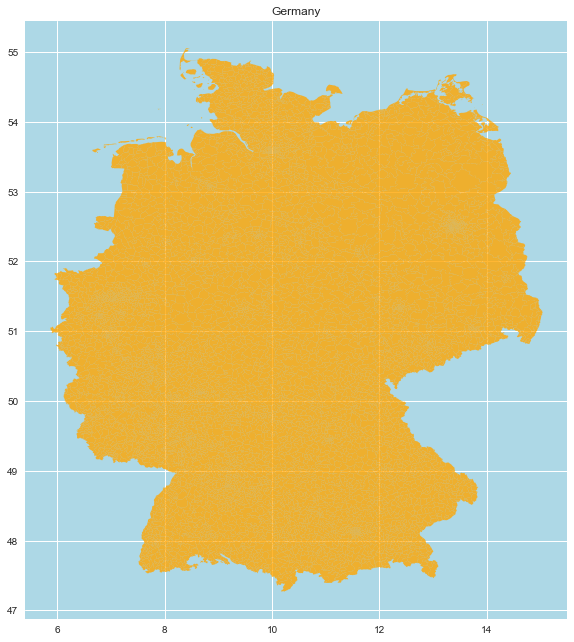

In [3]:
# We can use geopandas mapping tools to generate the map with the plot method.
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)
ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [5]:
# Load Data with the predicted suitability of each station = csv result of the machine learning model
solar_df_to_map = pd.read_csv('../data/solarmodel_prediction_addedinfo.csv')
print(solar_df_to_map.head(10))
solar_df_to_map.info()

## Zeile 54 Station 20210 muss gelöscht werden aus csv, da falsche Koordinaten

      id       temp      dwpt       rhum      prcp        wdir       wspd  \
0  10004  11.183591  8.360795  83.261821  0.080176  198.548310  30.126426   
1  10007  11.081906  7.946762  81.555184  0.105059  203.361730  29.454347   
2  10015  10.936814  7.477791  79.947582  0.089194  204.287527  26.965759   
3  10018  10.798407  7.650422  82.246560  0.103887  204.459598  22.528988   
4  10020  10.451094  6.789513  79.452712  0.074267  205.829421  26.275399   
5  10022  10.018232  6.643208  81.443326  0.093980  193.680252  17.103179   
6  10026  10.453009  7.168569  81.664075  0.122561  198.212857  15.576841   
7  10028  10.505162  7.083428  80.923883  0.086501  202.931974  22.963651   
8  10033  10.240420  6.688408  80.381286  0.101760  203.932248  21.195655   
9  10034  10.344264  7.131879  82.001004  0.093608  194.162758  16.906166   

        wpgt         pres       tsun  is clear_mean  pv_prediction  \
0  41.561255  1013.817822   0.000000       0.208967              0   
1  40.476545

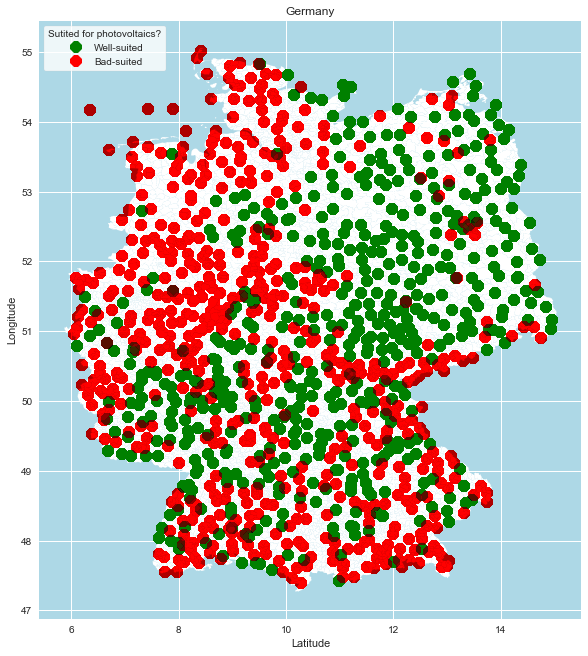

In [6]:
# Plot stations in different colours, depending on the "suitable for PV"
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    color='white', 
    alpha= 1
)


for value in solar_df_to_map["pv_prediction"]:
    if value == 0:
        # create temporary table, filter table df by conditions
        temp_table = solar_df_to_map[solar_df_to_map["pv_prediction"]==0]
        # Plot city location centroid for bad suited stations in red
        bad_suited =ax.plot(
            temp_table["longitude"], #longitude
            temp_table["latitude"], #latitude
            marker='8',
            markersize = 12,
            c='red', 
            alpha= 0.01 ,
            linestyle="None" 
        )
        
    elif value == 1:
        temp_table = solar_df_to_map[solar_df_to_map["pv_prediction"]==1]
        # Plot city location centroid for medium suited stations in orange
        mid_suited =ax.plot(
            temp_table["longitude"], #longitude
            temp_table["latitude"], #latitude 
            marker='8',
            markersize = 13,
            c='green', 
            alpha=0.01,
            linestyle="None" 
        )

ax.set(
    title='Germany',
    xlabel = 'Latitude',
    ylabel = 'Longitude',
    aspect=1.3, 
    facecolor='lightblue'
)

green_line = mlines.Line2D([], [], color='green', marker='8',
                          markersize=13, label='Well-suited',linestyle="None")

red_line = mlines.Line2D([], [], color='red', marker='8',
                          markersize=13, label='Bad-suited',linestyle="None")


plt.legend(handles=[green_line, red_line],
           title = 'Sutited for photovoltaics?',
           facecolor = 'white',
           loc = 'upper left',
           fontsize = 'medium', 
           frameon = True 
           )
